In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('bigdatapandas.xlsx')

df=pd.DataFrame(df)

df

,Year of diagnosis,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age recode with single ages and 100+,Primary Site - labeled,Grade (thru 2017),Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,SEER registry (with CA and GA as whole states),Marital status at diagnosis,Appalachia,Behavior recode for analysis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,Malignant
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,Malignant
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,Malignant
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,Malignant
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Non-Spanish-Hispanic-Latino,Female,85+ years,91 years,C18.1-Appendix,Blank(s),Regional,1,Alive,2,Kentucky,Widowed,0,Malignant
34014,2018,Black,Non-Spanish-Hispanic-Latino,Male,75-79 years,75 years,C18.0-Cecum,Blank(s),Regional,1,Alive,6,Kentucky,Single (never married),0,Malignant
34015,2018,White,Non-Spanish-Hispanic-Latino,Male,60-64 years,64 years,C18.0-Cecum,Blank(s),Regional,1,Alive,9,Kentucky,Divorced,0,Malignant
34016,2018,White,Non-Spanish-Hispanic-Latino,Female,75-79 years,76 years,C18.2-Ascending colon,Blank(s),Regional,1,Alive,3,Kentucky,Single (never married),0,Malignant


# Part-1

## Deleting the specified Columns

In [5]:
l=['Origin recode NHIA (Hispanic, Non-Hisp)','COD to site recode','Behavior recode for analysis']

for i in l:
    df.drop(columns=i,inplace=True)

# Encoding Race Column

In [8]:
l=[]
for i in df['Race recode (W, B, AI, API)']:
    if i=='White':
        l.append(0)
    elif i=='Black':
        l.append(1)
    elif i=='American Indian/Alaska Native':
        l.append(2)
    elif i=='Asian or Pacific Islander':
        l.append(3)
    else:
        l.append(9)
df['Race recode (W, B, AI, API)']=l

# Encoding Sex column

In [10]:
l=[]
for i in df['Sex']:
    if i=='Male':
        l.append(0)
    else:
        l.append(1)
df['Sex']=l

# Median of "Age recode with <1 year olds" column

In [21]:
from statistics import median
l=[i.replace('years','') for i in df['Age recode with <1 year olds']]

m=[]
for i in l:
    temp=i.split('-')
    if (len(temp)==2):
        m.append((int(temp[0])+int(temp[1]))//2)
    else:
        m.append(int(i.replace('+','')))

print('Meadian of "Age recode with <1 year olds are" :',m)

Meadian of "Age recode with <1 year olds are" [82, 77, 67, 85, 82, 72, 57, 72, 82, 85, 82, 52, 77, 77, 85, 85, 77, 82, 72, 67, 72, 85, 67, 72, 82, 42, 67, 77, 77, 77, 67, 77, 72, 67, 47, 57, 82, 72, 62, 72, 85, 62, 52, 57, 72, 62, 62, 42, 77, 62, 85, 82, 67, 82, 67, 62, 57, 72, 47, 52, 57, 77, 67, 57, 82, 72, 82, 77, 67, 62, 82, 82, 62, 77, 77, 77, 62, 77, 52, 62, 57, 85, 27, 82, 62, 47, 77, 82, 72, 82, 82, 62, 77, 82, 62, 85, 42, 85, 77, 85, 67, 85, 77, 47, 57, 72, 85, 85, 82, 57, 67, 82, 27, 62, 82, 67, 85, 85, 72, 62, 52, 67, 85, 62, 62, 82, 77, 72, 57, 47, 72, 72, 72, 67, 52, 47, 62, 72, 62, 72, 57, 72, 82, 82, 67, 67, 47, 42, 67, 82, 67, 82, 67, 67, 82, 62, 27, 52, 77, 85, 72, 72, 57, 72, 72, 42, 72, 77, 72, 57, 57, 62, 52, 62, 62, 47, 72, 72, 67, 72, 77, 85, 85, 57, 57, 67, 72, 72, 52, 77, 52, 85, 67, 72, 47, 52, 52, 37, 67, 82, 57, 52, 72, 77, 67, 82, 77, 67, 47, 82, 72, 57, 62, 62, 85, 85, 57, 67, 82, 72, 85, 62, 62, 57, 77, 67, 85, 72, 77, 72, 57, 67, 82, 85, 67, 72, 85, 82, 7

# Part-2

# Age vs Survival

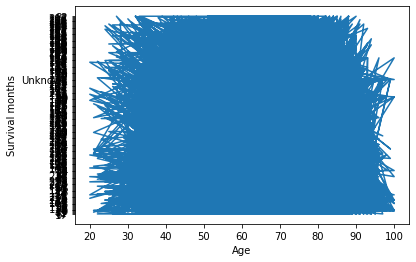

In [46]:
from matplotlib import pyplot as plt

l=[]

for i in df['Age recode with single ages and 100+']:
    temp=i.split(' ')
    if ('+' not in temp[0]):
        l.append(int(temp[0]))
    else:
        l.append(int(temp[0].replace('+','')))

m=list(df['Survival months'])

plt.plot(l,m)

plt.xlabel('Age')
plt.ylabel('Survival months')

plt.show()

# Race vs Survival

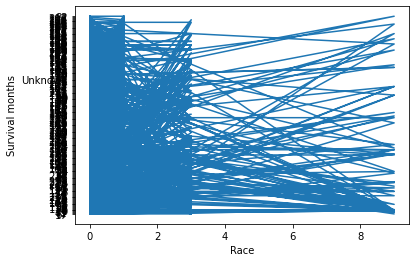

In [39]:
l=list(df['Race recode (W, B, AI, API)'])
m=list(df['Survival months'])

plt.plot(l,m)

plt.xlabel('Race')
plt.ylabel('Survival months')

plt.show()

# Sex vs Survival

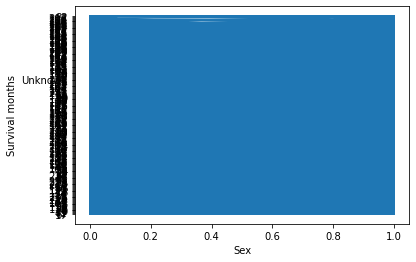

In [49]:
l=list(df['Sex'])
m=list(df['Survival months'])

plt.plot(l,m)

plt.xlabel('Sex')
plt.ylabel('Survival months')

plt.show()

# Bar chart showing diagnosis counts by year

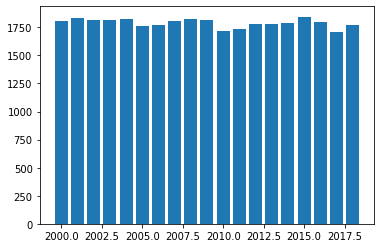

In [63]:
d={}
for i in df['Year of diagnosis']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
l=list(d.keys())
m=list(d.values())
# c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(l,m,width=0.8)

plt.show()

# Bar chart showing diagnosis counts by race

<BarContainer object of 5 artists>

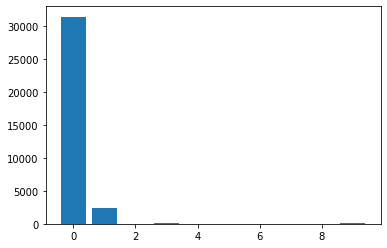

In [65]:
d={}

for i in df['Race recode (W, B, AI, API)']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

l=list(d.keys())
m=list(d.values())

plt.bar(l,m,width=0.8)

# Bar chart showing diagnosis counts for Appalachia vs non-Appalachia patients

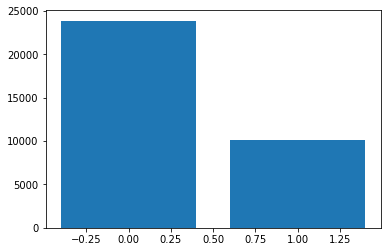

In [67]:
d={1:0,0:0}

for i in df['Appalachia']:
    d[i]+=1

l=d.keys()
m=d.values()

plt.bar(l,m)
plt.show()

# Bar chart showing diagnosis counts by SEER registry

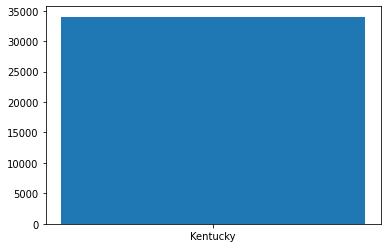

In [70]:
d={}

for i in df['SEER registry (with CA and GA as whole states)']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

l=d.keys()
m=d.values()

plt.bar(l,m,width=0.6)

plt.show()

# Scatterplot of grade vs survival time

# Line chart of survival rate over time, grouped by stage at diagnosis

# Histogram of age at diagnosis

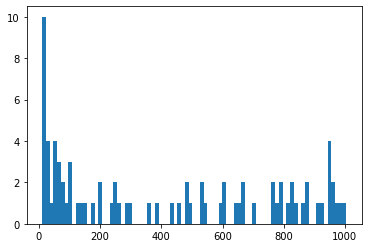

In [91]:
d={}

for i in df['Age recode with single ages and 100+']:
    i=i.split(' ')[0]
    i=int(i.replace('+',''))
    if i in d:
        d[i]+=1
    else:
        d[i]=1

l=list(d.keys())
m=list(d.values())

plt.hist(m,bins=len(l))
plt.show()